Chi-Quadrat-Statistik: 1.327
p-Wert: 0.2493
Freiheitsgrade: 1
Erwartete Häufigkeiten:
 [[29.38356164 25.61643836]
 [ 9.61643836  8.38356164]]


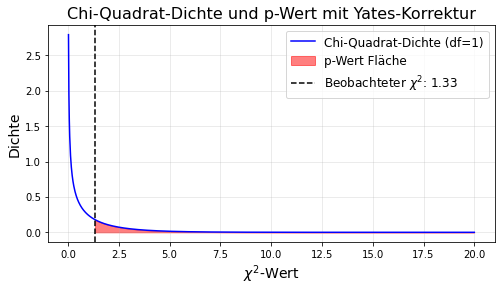

In [1]:
import numpy as np
from scipy.stats import chi2, chi2_contingency
import matplotlib.pyplot as plt

# Beobachtete Häufigkeiten (ändern für andere Werte)
observed = np.array([
    [32, 23],  # Beispielwerte
    [7, 11]
])

# Chi-Quadrat-Test durchführen
chi2_stat, p_value, dof, expected = chi2_contingency(observed,correction=True)

# Ergebnisse ausgeben
print("Chi-Quadrat-Statistik:", round(chi2_stat, 3))
print("p-Wert:", round(p_value, 4))
print("Freiheitsgrade:", dof)
print("Erwartete Häufigkeiten:\n", expected)

# Plot der Chi-Quadrat-Dichte
x = np.linspace(0, 20, 1000)  # Wertebereich für die x-Achse
chi2_pdf = chi2.pdf(x, dof)   # Chi-Quadrat-Dichtefunktion für die gegebenen Freiheitsgrade

# Erstellen der Grafik
plt.figure(figsize=(8, 4))
plt.plot(x, chi2_pdf, label=f'Chi-Quadrat-Dichte (df={dof})', color='blue')

# Hervorheben der Fläche (p-Wert)
x_fill = np.linspace(chi2_stat, 20, 1000)
plt.fill_between(x_fill, chi2.pdf(x_fill, dof), color='red', alpha=0.5, label='p-Wert Fläche')

# Markieren des Chi-Quadrat-Werts
plt.axvline(x=chi2_stat, color='black', linestyle='--', label=f'Beobachteter $\chi^2$: {round(chi2_stat, 2)}')

# Achsenbeschriftungen und Legende
plt.title('Chi-Quadrat-Dichte und p-Wert mit Yates-Korrektur', fontsize=16)
plt.xlabel('$\chi^2$-Wert', fontsize=14)
plt.ylabel('Dichte', fontsize=14)
plt.legend(fontsize=12)
plt.grid(alpha=0.3)
plt.show()